# Classification

This code will attempt to predict whether a person has a heart cndition or not based on defined features.

In [1]:
import pandas as pd
url = 'https://raw.githubusercontent.com/karelsti/Data-Analyst-Portfolio/main/python_datamining/classification/heart.csv'
heart = pd.read_csv(url)
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [2]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


These data types are consistent with our expectations. The HeartDisease column is our target variable (1 = heart disease, 0 = no heart disease).

In [3]:
def missing_values_finder(df):
    missing_values = df.isnull().sum()
    percentage_missing = (missing_values/len(df))*100
    df_missing_values = pd.DataFrame({
        'Missing Values' : missing_values,
        'Percentage of missing values' : percentage_missing})
    print('Missing Values Table')
    print(df_missing_values.sort_values('Missing Values', ascending = False))

missing_values_finder(heart)
print(heart['HeartDisease'].value_counts())

Missing Values Table
                Missing Values  Percentage of missing values
Age                          0                           0.0
Sex                          0                           0.0
ChestPainType                0                           0.0
RestingBP                    0                           0.0
Cholesterol                  0                           0.0
FastingBS                    0                           0.0
RestingECG                   0                           0.0
MaxHR                        0                           0.0
ExerciseAngina               0                           0.0
Oldpeak                      0                           0.0
ST_Slope                     0                           0.0
HeartDisease                 0                           0.0
HeartDisease
1    508
0    410
Name: count, dtype: int64


### Missing values ###

We have no NA values and we can see that in our dataset there's more patient with a heart disease than patients without one.

Analysis of numerical features divided into two groups based on HeartDisease column.

In [4]:
heart_disease = heart[heart['HeartDisease'] == 1]
no_heart_disease = heart[heart['HeartDisease'] == 0]

numerical= heart.select_dtypes('number').columns
categorical = heart.select_dtypes('object').columns

heart_disease_means = heart_disease[numerical].mean()
no_heart_disease_means = no_heart_disease[numerical].mean()
heart_disease_medians = heart_disease[numerical].median()
no_heart_disease_medians = no_heart_disease[numerical].median()

means_combined = pd.DataFrame({
    'Heart Disease Means': heart_disease_means,
    'No Heart Disease Means': no_heart_disease_means,
    'Heart Disease Medians': heart_disease_medians,
    'No Heart Disease Medians': no_heart_disease_medians
})

means_combined

,Heart Disease Means,No Heart Disease Means,Heart Disease Medians,No Heart Disease Medians
Age,55.899606,50.551220,57.0,51.0
RestingBP,134.185039,130.180488,132.0,130.0
Cholesterol,175.940945,227.121951,217.0,227.0
FastingBS,0.334646,0.107317,0.0,0.0
MaxHR,127.655512,148.151220,126.0,150.0
Oldpeak,1.274213,0.408049,1.2,0.0
HeartDisease,1.000000,0.000000,1.0,0.0


Age: Patients with heart disease tend to be older on average (~56 years vs. ~50 years).

Resting Blood Pressure: Slightly higher in heart disease patients (134 vs. 130).

Cholesterol: Lower on average in heart disease patients (176 vs. 227).

Fasting Blood Sugar: Higher in heart disease patients (0.33 vs. 0.11).

Maximum Heart Rate: Lower in heart disease patients (127.7 vs. 148.2), possibly indicating poorer cardiovascular fitness.

Oldpeak: Significantly higher in patients with heart disease (1.27 vs. 0.41).

In [5]:
heart[numerical].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [6]:
heart[categorical].describe().T

,count,unique,top,freq
Sex,918,2,M,725
ChestPainType,918,4,ASY,496
RestingECG,918,3,Normal,552
ExerciseAngina,918,2,N,547
ST_Slope,918,3,Flat,460


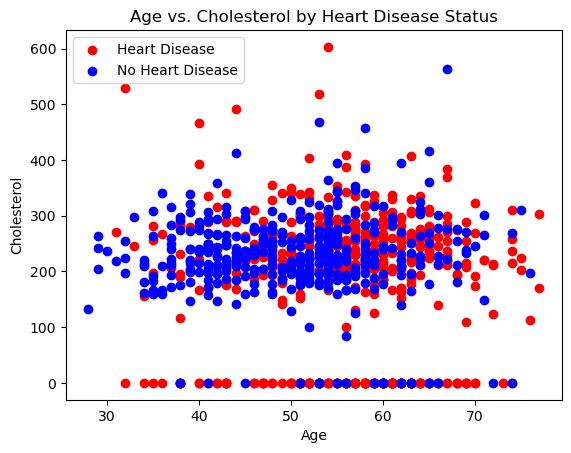

In [7]:
import matplotlib.pyplot as plt

plt.scatter(heart_disease['Age'], heart_disease['Cholesterol'], color='red', label='Heart Disease')
plt.scatter(no_heart_disease['Age'], no_heart_disease['Cholesterol'], color='blue', label='No Heart Disease')

plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Age vs. Cholesterol by Heart Disease Status')
plt.legend()
plt.show()

From the scatter plot there seems to be a positive relationship between age, cholesterol and heart disease but its rather inconclusive.

In [8]:
heart[numerical].corr(method = 'pearson')

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


Focusing only on  HeartDisease we can see relatively large positive relationship with Age, FastingBS and Oldpeak. On the other hand MxHR and Cholesterol have negative relationship with HeartDisease. 

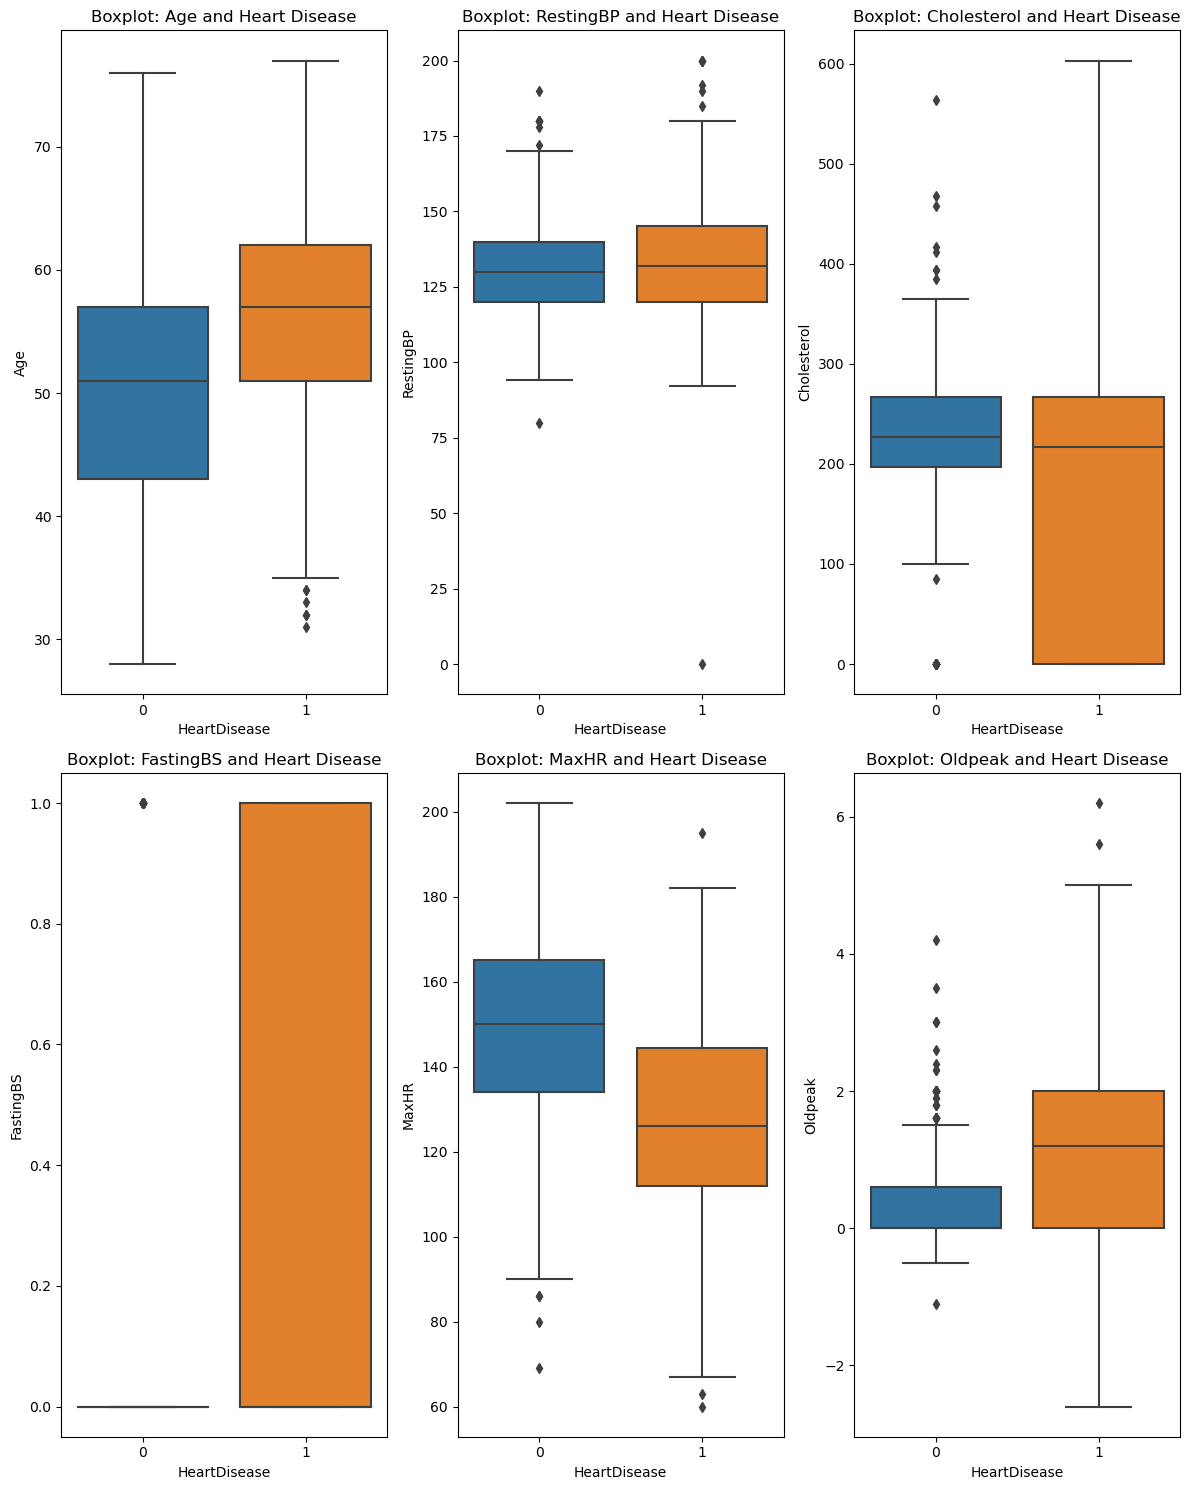

In [9]:
import seaborn as sns

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 15))
axes = axes.flatten()

for i in range(len(numerical)):
    if numerical[i] != 'HeartDisease': 
        sns.boxplot(x='HeartDisease', y=numerical[i], data=heart, ax=axes[i]) 
        axes[i].set_title(f'Boxplot: {numerical[i]} and Heart Disease')

for i in range(len(numerical), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


These boxplot visualisations confirm results of the correlation analysis.

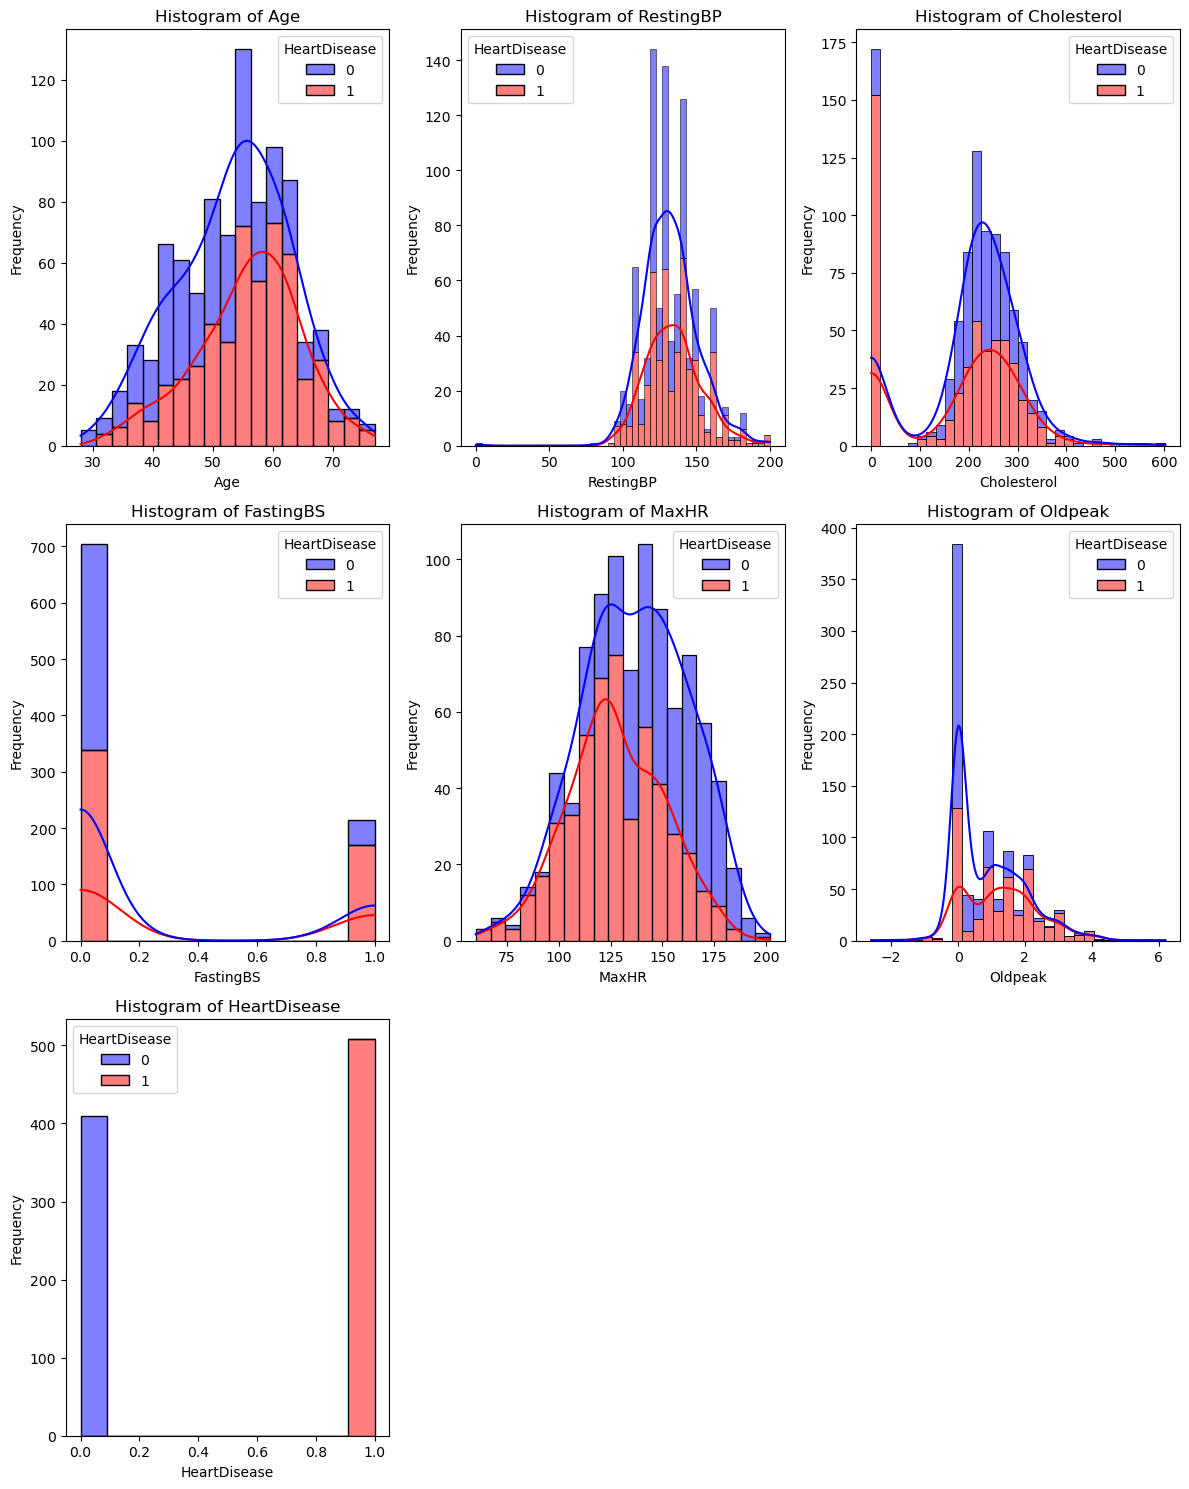

In [10]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 15))
axes = axes.flatten()

for i in range(len(numerical)):
    sns.histplot(heart, x=numerical[i], hue='HeartDisease', kde=True, ax=axes[i], multiple='stack', palette={0: 'blue', 1: 'red'}, fill=True)
    axes[i].set_title(f'Histogram of {numerical[i]}')
    axes[i].set_xlabel(numerical[i])
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for i in range(len(numerical), len(axes)):
    axes[i].axis('off')  # Hides the unused subplots

plt.tight_layout()
plt.show()


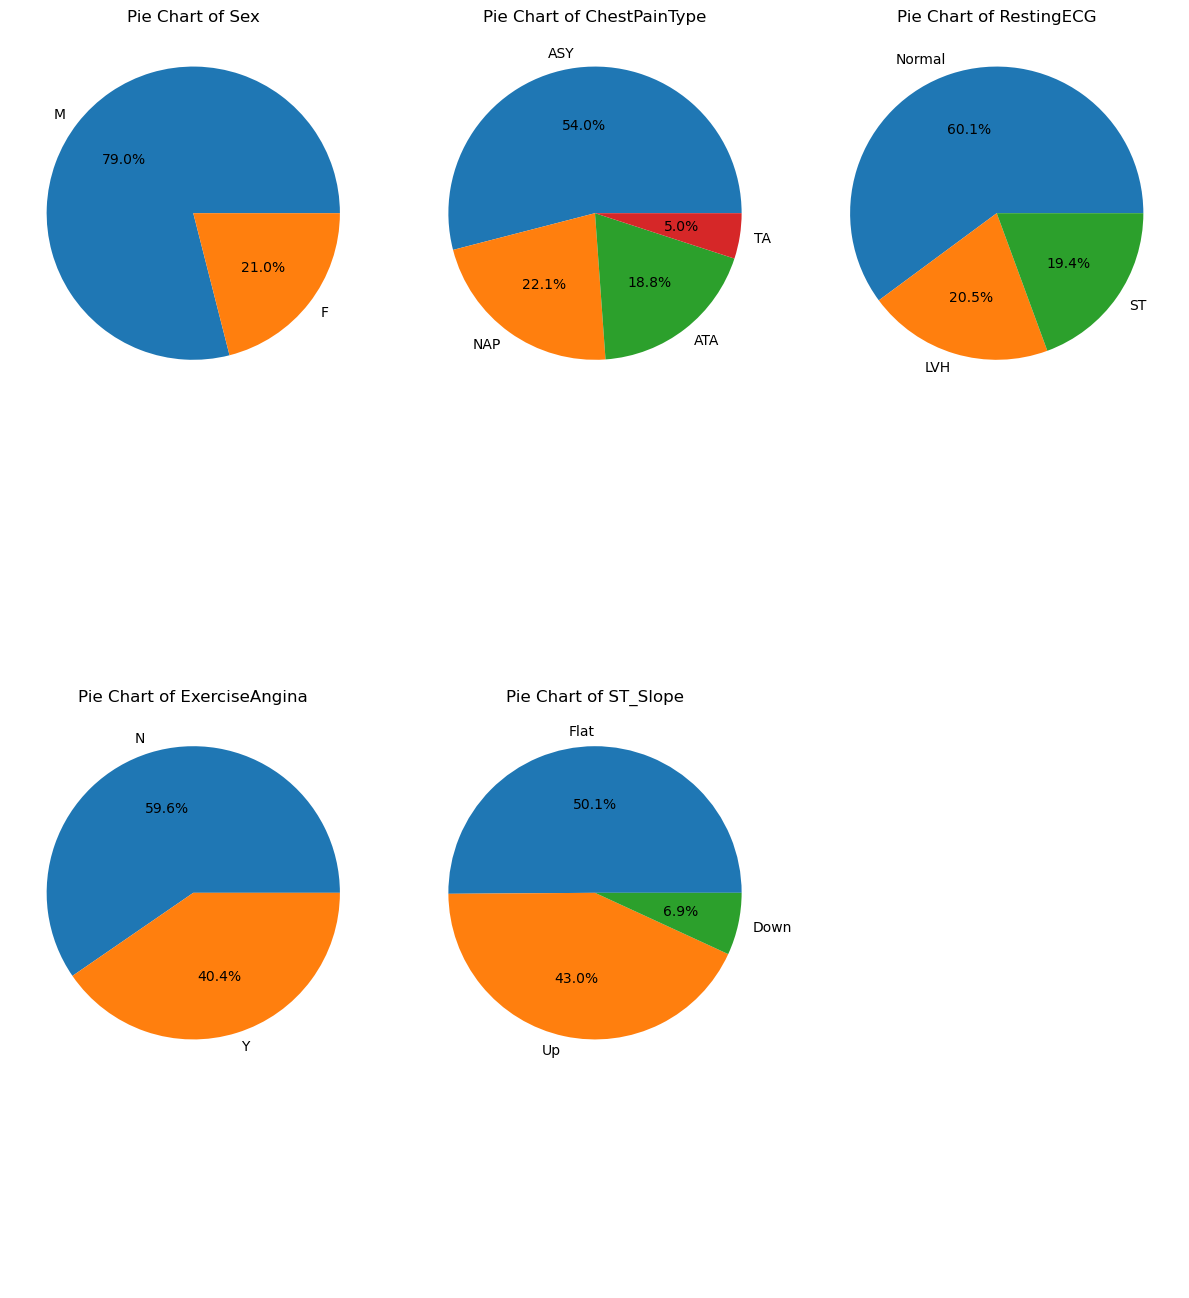

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 15))
axes = axes.flatten()

for i in range(len(categorical)):
    category_counts = heart[categorical[i]].value_counts()
    axes[i].pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
    axes[i].set_title(f'Pie Chart of {categorical[i]}')

for i in range(len(categorical), len(axes)):
    axes[i].axis('off')  

plt.tight_layout()
plt.show()

These piecharts display distribution within our categorical features.

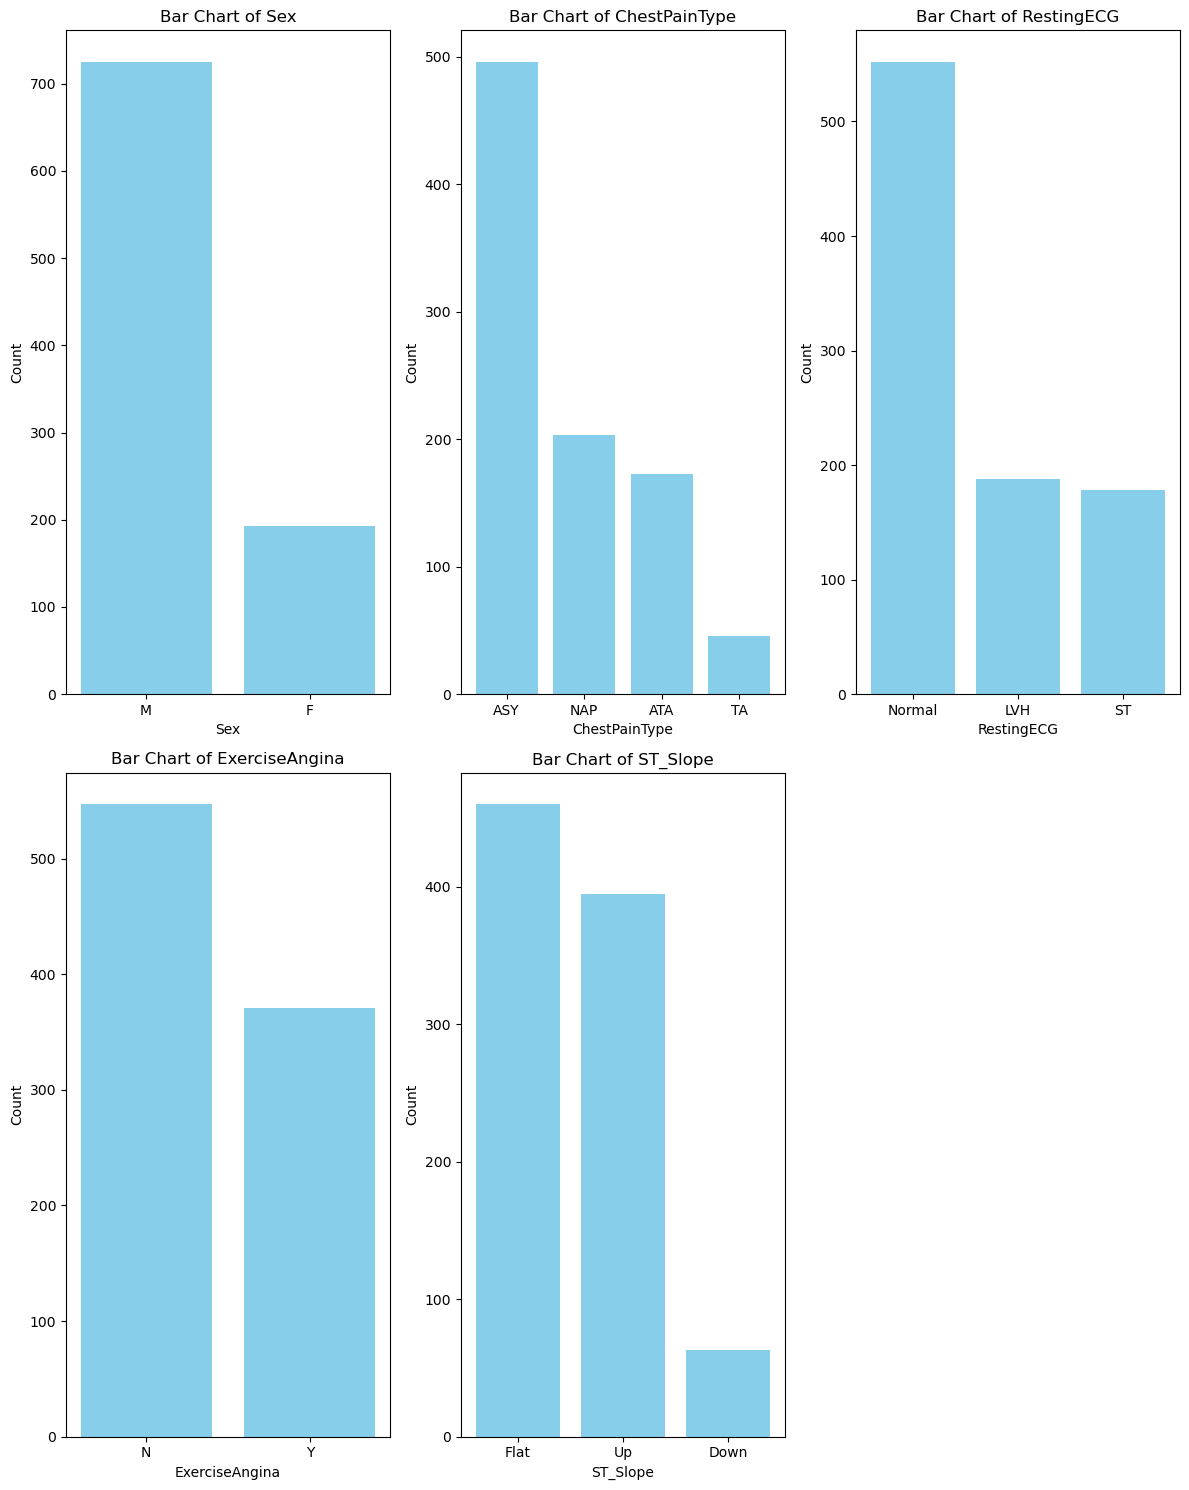

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 15))
axes = axes.flatten()

for i in range(len(categorical)):
    col = categorical[i]
    category_counts = heart[col].value_counts()
    axes[i].bar(category_counts.index, category_counts.values, color='skyblue')
    axes[i].set_title(f'Bar Chart of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

for i in range(len(categorical), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [13]:
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [14]:
df_encoded = pd.get_dummies(heart, columns=['ChestPainType', 'Sex', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], drop_first=True)

df_encoded.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,Sex_M,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,True,False,False,True,True,False,False,False,True
1,49,160,180,0,156,1.0,1,False,True,False,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,True,False,False,True,False,True,False,False,True
3,48,138,214,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,0,False,True,False,True,True,False,False,False,True


This converts categorical variables into binary columns and always removes one redundant category from each feature to prevent multicollinearity.

In [15]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler() # Standardization

df_encoded['Oldpeak'] = ss.fit_transform(df_encoded[['Oldpeak']])
df_encoded['Age'] = ss.fit_transform(df_encoded[['Age']])
df_encoded['RestingBP'] = ss.fit_transform(df_encoded[['RestingBP']])
df_encoded['Cholesterol'] = ss.fit_transform(df_encoded[['Cholesterol']])
df_encoded['MaxHR'] = ss.fit_transform(df_encoded[['MaxHR']])
df_encoded.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,Sex_M,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.410909,0.825070,0,1.382928,-0.832432,0,True,False,False,True,True,False,False,False,True
1,-0.478484,1.491752,-0.171961,0,0.754157,0.105664,1,False,True,False,False,True,False,False,True,False
2,-1.751359,-0.129513,0.770188,0,-1.525138,-0.832432,0,True,False,False,True,False,True,False,False,True
3,-0.584556,0.302825,0.139040,0,-1.132156,0.574711,1,False,False,False,False,True,False,True,True,False
4,0.051881,0.951331,-0.034755,0,-0.581981,-0.832432,0,False,True,False,True,True,False,False,False,True


Our features have different ranges which can negatively impact the model training, therefore we need to standardize them to ensure that they have equal influence.

In [16]:
numerical_encoded= df_encoded.select_dtypes('number').columns
df_encoded[numerical_encoded].corr(method = 'pearson')
# The correlation remained the same

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


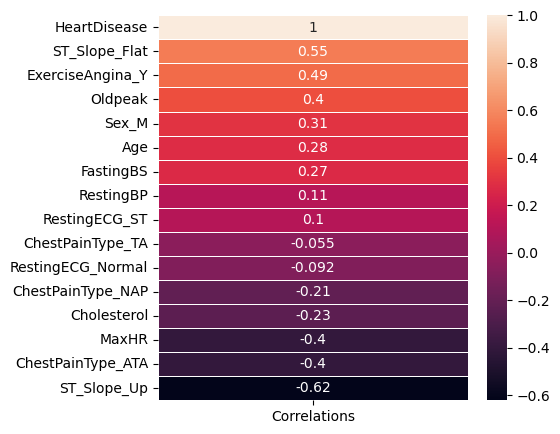

In [17]:
corr = df_encoded.corrwith(df_encoded['HeartDisease']).sort_values(ascending=False).to_frame()
corr.columns = ['Correlations']

plt.figure(figsize=(5,5))
sns.heatmap(corr, annot=True, linewidths=0.4)
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
x = df_encoded.drop(['HeartDisease'], axis=1)  # Features
y = df_encoded['HeartDisease']  # Target variable

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=101)

This code splits the dataset into training and testing sets, where 90% of the data is used for training.

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=500, random_state=42)

In [20]:
from sklearn.metrics import classification_report,confusion_matrix
rf_pre=rf.predict(x_test)
print(confusion_matrix(y_test,rf_pre))

[[36  5]
 [ 7 44]]


Focusing on false negatives where the model misclassified a person with heart disease as not having it, the model recorded 7 such cases.

In [21]:
print(classification_report(y_test,rf_pre))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86        41
           1       0.90      0.86      0.88        51

    accuracy                           0.87        92
   macro avg       0.87      0.87      0.87        92
weighted avg       0.87      0.87      0.87        92



The model seems to be performing quite well with the overall accuracy is strong at 87%.

In [22]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=5, criterion='entropy', random_state=42)
dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [23]:
dt_pre=dt.predict(x_test)
print(confusion_matrix(y_test,dt_pre))

[[35  6]
 [ 9 42]]


Here the number of False Negatives increased.

In [24]:
print(classification_report(y_test,dt_pre))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82        41
           1       0.88      0.82      0.85        51

    accuracy                           0.84        92
   macro avg       0.84      0.84      0.84        92
weighted avg       0.84      0.84      0.84        92



The decision tree model is showing weaker overall metrics than random forest model.

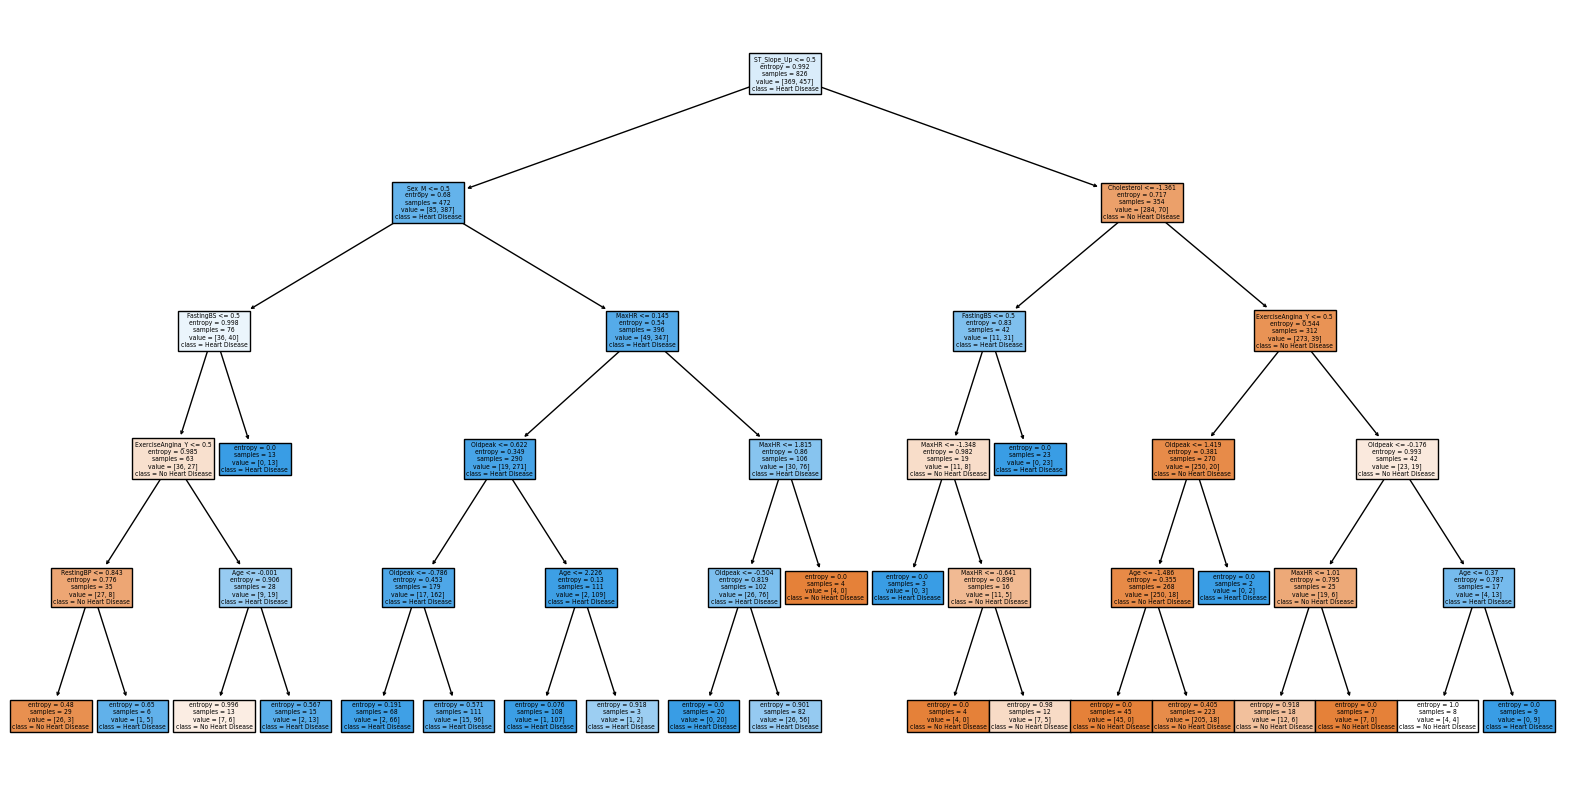

In [25]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(dt, filled=True, feature_names=list(x_train.columns), class_names=['No Heart Disease', 'Heart Disease'])
plt.show()